In [35]:
import mazebox as mb
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import dropkick as dk
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
sig_matrix = pd.read_csv('../data/sig_matrix_ParTI.csv', header =0, index_col = 0)


## qRT-PCR Data on 96 Cells sorted from a TKO HES1-GFP mouse

In a real time PCR assay a positive reaction is detected by accumulation of a fluorescent signal. The Ct
(cycle threshold) is defined as the number of cycles required for the fluorescent signal to cross the
threshold (ie exceeds background level). Ct levels are inversely proportional to the amount of target
nucleic acid in the sample (ie the lower the Ct level the greater the amount of target nucleic acid in the
sample). WVDL real time assays undergo 40 cycles of amplification.

In [68]:
fluidigm = pd.read_csv('../data/julien/Fluidigm 121616_negmedhigh_ALL.csv',header = 0, index_col=0, na_values=999.000000)
fluidigm.head()

,ACTB,FSTL1,JAG1,HEY2,MYCL1,PCNA,ASCL1,CHGA,GAPDH,HSP90AB1,...,HES5,MDK,NOTCH4,UCHL1,DLL3,emeraldGFP,HEY1,MYC,SLPI,VIM
cells,,,,,,,,,,,,,,,,,,,,,
high-1,17.297219,18.375979,21.381467,NaN,NaN,17.426503,15.934018,20.004236,13.996393,15.251272,...,25.256704,19.029584,NaN,20.276332,23.571106,18.621998,20.082602,21.092399,28.045781,NaN
high-10,19.930029,17.714447,NaN,26.981650,21.948718,20.114873,16.640845,NaN,13.547609,15.764897,...,22.884279,16.553914,NaN,NaN,27.037854,18.048322,20.666837,NaN,22.082947,NaN
high-11,22.227082,NaN,23.555593,NaN,NaN,21.106782,17.398433,NaN,19.038580,18.383987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.864049,21.055654
high-12,20.088931,18.235974,25.784730,24.109953,23.262319,18.725506,17.848978,NaN,14.132712,16.370915,...,NaN,18.432730,NaN,NaN,NaN,17.629359,20.410972,NaN,22.089643,NaN
high-13,19.743891,18.127821,NaN,22.347828,NaN,19.907136,18.470735,NaN,15.074564,17.989175,...,23.573601,19.867248,NaN,NaN,NaN,16.884614,NaN,NaN,24.459607,20.312492


In [44]:
sig_set = set(sig_matrix.index).intersection(set(fluidigm.columns))

In [51]:
sig_matrix.loc[sig_set]

,SCLC-A,SCLC-A2,SCLC-N,SCLC-P,SCLC-Y
0,,,,,
ASCL1,8.016136,10.811373,1.730900,1.047405,0.876617
FSTL1,3.188097,0.251629,3.015220,1.467848,8.218893
SLPI,0.826914,3.000080,-0.591431,0.776115,3.070599
VIM,1.829926,1.448534,3.712030,3.842298,11.021428
CALCA,0.284731,6.910045,-0.574647,1.826023,1.557183


In [39]:
geneNames = pd.read_csv('/Users/smgroves/Documents/MATLAB/particode/Data/geneNames_wo_lowgenes.csv', header = None, index_col=0)
archetypes = pd.read_csv('/Users/smgroves/Documents/MATLAB/particode/out/arc_gene_space_no_lowgenes.csv', header = None)
archetypes = archetypes.T
archetypes.index = geneNames.index
archetypes.columns = ['SCLC-Y','SCLC-P','SCLC-N','SCLC-A2','SCLC-A']


In [40]:
archetypes

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,,,,,
A1BG,3.639489,1.927857,4.448826,3.321331,4.151298
A1CF,0.218535,0.690655,0.011054,0.600117,-0.178952
A2M,0.915044,0.403488,0.262599,0.418040,0.058488
A2ML1,0.145542,0.073408,0.025584,0.033519,0.096227
A4GALT,3.311321,0.334271,1.159494,1.775815,0.996153
...,...,...,...,...,...
ZYG11A,2.691283,1.472013,1.617559,1.046140,1.468553
ZYG11B,3.441079,2.945174,3.714482,3.463426,4.023066
ZYX,7.904851,2.738392,4.348194,1.877991,2.054564


Because the fluidigm measurements cannot be directly used in the archetype analysis, I will compare the overlapping genes by looking at CT values across the three samples and see if there is any evidence that HES1-intermediate is more of a generalist phenotype.

In [41]:
gene_set = set(archetypes.index).intersection(set(fluidigm.columns))

In [42]:
fluidigm['GFP_level'] = [x.split('-')[0] for x in fluidigm.index]    

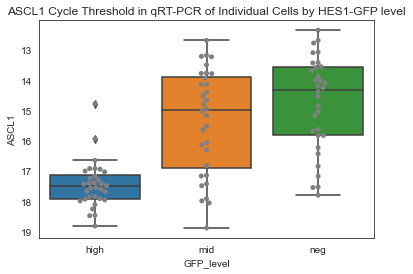

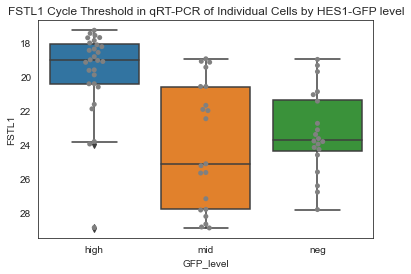

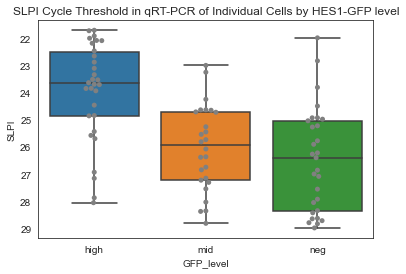

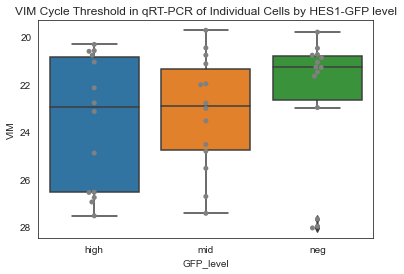

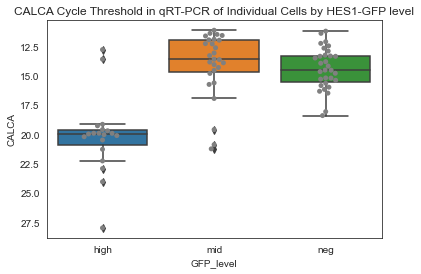

In [52]:
for g in sig_set:
    plt.figure()
    ax = sns.boxplot(data=fluidigm, x = 'GFP_level', y = g)
    ax = sns.swarmplot(data=fluidigm, x = 'GFP_level', y = g, color="grey")
    ax.invert_yaxis()
    plt.title(f"{g} Cycle Threshold in qRT-PCR of Individual Cells by HES1-GFP level")

(In the above graphs, I am correlating low CT value with high expression and will use those interchangeably below). 

As expected, ASCL1 and CALCA are most expressed in the GFP-low cells, though CALCA is slightly more expressed in GFP-int cells. FSTL1 is most associated with SCLC-Y, and is concordantly more expressed in GFP-high cells. SLPI is high in Y and A2, and shows highest expression in GFP-high as expected. VIM is strange- GFP-low cells have the highest median, but a significant proportion of those cells have the lowest expression. I would have expected GFP-high cells to have high VIM. 

From the paper:
> Non-NE SCLC cells marked by high expression of CD44 and mesenchymal markers (for example, vimentin) were previously described17, but the majority of GFPhigh cells expressed the epithelial marker EpCam, had no detectable CD44 on their surface, and did not upregulate vimentin (Extended Data Fig. 2m, n),  indicating that GFPhigh and CD44high cell populations within primary TKO tumours are largely distinct.

## Bulk Tumor Microarray data

In [65]:
tumor = pd.read_csv('../data/julien/bulk_microarray_DEgenes.csv',header = 0, index_col=0)
tumor.index = [i.upper() for i in tumor.index]
tumor = tumor.T
tumor

,FMO2,LAMP3,PON1,SLC34A2,CXCL15,CCKAR,SLCO4C1,RETNLA,CHAD,GJA1,...,SCN7A,SHISA6,PCDHB17,GDAP1,SERPINI1,CACNG7,CACNA2D1,GM3715,CLCA2,ELAVL3
GFPneg #1,5.868698,4.168371,3.648526,5.459933,4.702184,5.253648,4.302417,3.885642,6.406460,4.879004,...,9.240716,9.133443,7.750601,8.445239,8.586020,8.970376,10.117203,5.981640,8.769976,10.093459
GFPneg #2,6.814905,4.330130,4.399748,5.964736,5.250968,6.058546,4.400206,5.344718,7.142683,4.771221,...,9.690567,9.722755,7.850004,8.222672,8.700427,8.804972,10.181673,6.308630,9.309510,9.558766
GFPneg #3,5.727423,3.977253,3.928227,5.195827,4.802366,5.217113,3.880124,4.192199,6.555159,4.443827,...,8.522825,9.405387,7.985437,8.233083,7.985897,10.211559,10.019760,6.619698,9.057529,10.480220
GFPhigh #1,11.788377,9.798961,9.719728,11.207512,10.340449,11.167993,9.906594,10.287090,12.159656,10.400926,...,6.357764,6.222146,4.835873,4.903299,5.482366,6.465832,7.038719,4.199281,5.332999,6.833920
GFPhigh #2,11.978208,9.867459,9.665342,11.265563,10.309695,11.099115,9.609464,9.887134,12.110857,9.706779,...,5.863830,6.365477,4.635051,5.107879,5.031480,5.992790,6.645610,2.869063,5.991835,6.227102
GFPhigh #3,11.944784,10.099751,9.863485,11.102710,11.008014,11.058128,9.748233,9.921679,12.295158,10.244428,...,6.905837,7.305343,5.722116,6.418002,6.139038,6.799492,7.754947,2.854105,6.648476,7.570295


In [87]:
import itertools as it

def get_duplicate_cols(df: pd.DataFrame):
    return pd.Series(df.columns).value_counts()[lambda x: x>1]

def get_dup_col_indices(df: pd.DataFrame, col: str):
    return [x[0] for x in enumerate(df.columns)
            if x[1]==col][1:]

def get_all_dup_col_indices(df: pd.DataFrame):
    dup_cols = get_duplicate_cols(df).index

    return sorted(list(it.chain.from_iterable(get_dup_col_indices(df, x)
                           for x in dup_cols)))

In [89]:
from toolz.itertoolz import sliding_window


def remove_dup_cols(df: pd.DataFrame):
    indices_to_remove =  get_all_dup_col_indices(df)

    if len(indices_to_remove)==0:
        return df
    window = list(sliding_window(2, indices_to_remove))

    first = df.iloc[:, :indices_to_remove[0]]
    middle = [df.iloc[:, x[0] + 1 : x[1]] for x in window]
    last = df.iloc[:, indices_to_remove[-1] + 1:]

    if (indices_to_remove[-1]) == (df.shape[1]-1):
        return pd.concat([first] + middle, axis=1)
    else:
        return pd.concat([first] + middle + [last], axis=1)


tumor = remove_dup_cols(tumor)

In [90]:
def transform_tumor_space_csv(tumor, gene_sig, unlog = False, type = None, scale = False, scaling = None, spliced = False, eps = 0.001):
    if unlog == True:
        tumor = np.expm1(tumor)
    print("Transforming tumor data...")
    glist_keep = []
    for num,i in enumerate(gene_sig.index.values):
        if i in tumor.columns:
            glist_keep.append(i)
    gene_sig = gene_sig.loc[gene_sig.index.isin(glist_keep)]
    if np.all(np.linalg.norm(gene_sig, axis = 0) != 1-eps):
        print("Renormalizing gene signature")
        gene_sig = gene_sig / np.linalg.norm(gene_sig, axis=0)
    print("Gene signature matrix now has shape: ", gene_sig.shape)
    tumor = tumor[gene_sig.index.values]
    print(tumor.columns)
    
    lanorm =np.linalg.norm(tumor, axis = 1)
    tumorx = (tumor.T/np.linalg.norm(tumor, axis = 1)).T
    data = pd.DataFrame(tumorx, columns=tumor.columns, index=tumor.index)

    df_inv, resid, rank, sing_values = np.linalg.lstsq(gene_sig, np.array(data).T)
    out = pd.DataFrame(df_inv.T)
    # out = np.arcsinh((out))
    if scale == True:
        out = out / scaling
    return out, gene_sig, tumor, lanorm

In [91]:
out, gene_sig, tumor, lanorm  = transform_tumor_space_csv(tumor, sig_matrix)

Transforming tumor data...
Renormalizing gene signature
Gene signature matrix now has shape:  (51, 5)
Index(['TAGLN3', 'ELAVL3', 'SOX1', 'NSG1', 'MBNL3', 'PTN', 'ILDR2', 'NNAT',
       'ASCL1', 'SCNN1A', 'WFDC2', 'TMEM176A', 'FAM3B', 'TMEM176B', 'CALCA',
       'TSPAN8', 'NPTX1', 'SCIN', 'KLK11', 'SKAP1', 'AOC1', 'KCNQ2', 'OLFM1',
       'CNTN1', 'SSTR2', 'SLC38A5', 'KCNJ3', 'PLCH2', 'ZFPM2', 'SPATS2L',
       'PLCG2', 'PLA2G4A', 'LGALS3', 'AZGP1', 'EHF', 'GAL', 'SOX9', 'CNN2',
       'FSTL1', 'YAP1', 'CRIM1', 'MRC2', 'CAV1', 'GPX8', 'AHNAK', 'TNFRSF10B',
       'OSMR', 'EMP1', 'HOXC10', 'MSRB3', 'SLPI'],
      dtype='object')


In [93]:
out.index = tumor.index
out.columns = sig_matrix.columns
out

,SCLC-A,SCLC-A2,SCLC-N,SCLC-P,SCLC-Y
GFPneg #1,-0.025354,0.562433,0.338002,0.094493,0.239935
GFPneg #2,-0.062385,0.593834,0.344216,0.085773,0.249488
GFPneg #3,0.007712,0.529368,0.335454,0.098224,0.243002
GFPhigh #1,0.013276,0.448101,0.190123,0.167120,0.393274
GFPhigh #2,0.002572,0.452294,0.196614,0.165296,0.391534
GFPhigh #3,0.015382,0.457680,0.211626,0.146428,0.383844


As expected, GFP negative cells are more neuroendocrine, and GFP positive are more non-NE. The three sets of GFP negative cells are mostly A2 with some N signature, and some Y. GFP positive cells have lower A2, lower N, and higher Y. Interestingly, all of the samples seem to be more mixed than expected. This may be because of A2 cells that are NE but are able to express HES1.